# Projeto Ciência de Dados - Previsão de Vendas

- O objetivo é conseguir prever as vendas que a Empresa terá em determinado período com base nos gastos em anúncios nas 3 grandes redes que ela investe: TV, Jornal e Rádio.

#### Importar a Base de dados

In [12]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [13]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Visualizar como as informações de cada item estão distribuídas.
- Visualizar a correlação entre cada um dos itens.

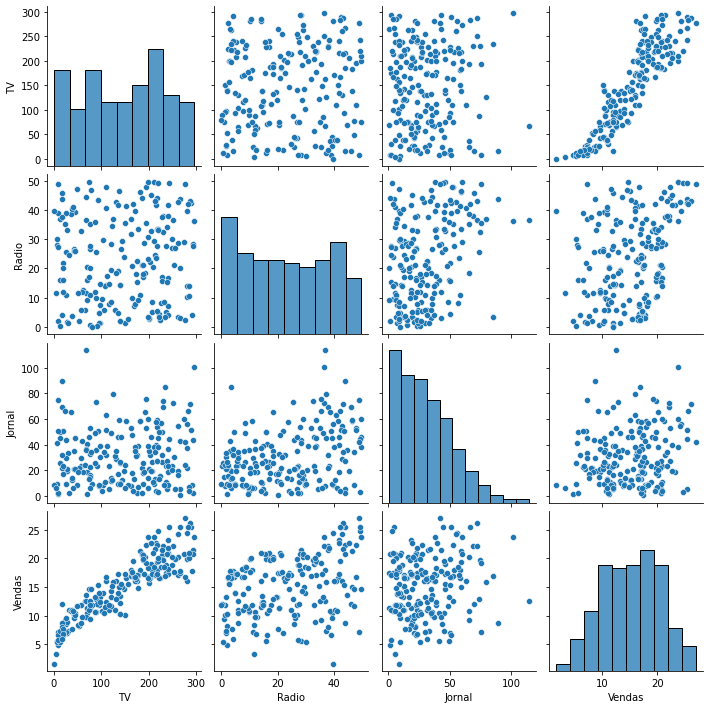

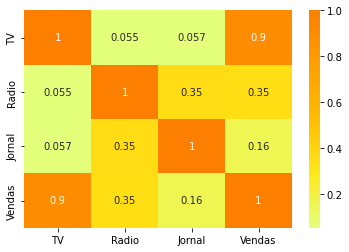

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(tabela)
plt.show()
sns.heatmap(tabela.corr(), cmap ='Wistia', annot =True)
plt.show()

#### Preparação dos dados para treinar o Modelo de Machine Learning

- Dados de treino e dados de teste.
- Utilizando 30% da base de dados para testar e 70% para treinar.

In [15]:
from sklearn.model_selection import train_test_split
x = tabela.drop('Vendas', axis=1)
y = tabela['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#### Por se tratar de ser um problema de regressao, pois quero descobrir o valor de venda no futuro, irei escolher qual dos modelos abaixo irei usar neste caso:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# criando a inteligencia artificial

linear = LinearRegression()
randomforest = RandomForestRegressor()

# treinando a inteligencia artificial

linear.fit(x_train, y_train)
randomforest.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da inteligencia artificial e avaliação do melhor modelo, escolhendo a melhor métrica.

- Usando o R² -> quanto maior o R², melhor sera o seu modelo. 
- Usando o MSE (Erro Quadrático Médio) -> quanto menor o MSE, melhor sera o seu modelo.

In [29]:
# testando a inteligencia artificial com as duas métricas

test_linear = linear.predict(x_test)
test_random = randomforest.predict(x_test)

r2_linear = metrics.r2_score(y_test, test_linear)
mse_linear = metrics.mean_squared_error(y_test, test_linear)
print(f"R² da Regressão Linear: {r2_linear}")
print(f"MSE da Regressão Linear: {mse_linear}")

r2_random= metrics.r2_score(y_test, test_random)
mse_random = metrics.mean_squared_error(y_test, test_random)
print(f"R² do Random Forest: {r2_random}")
print(f"MSE do Random Forest: {mse_random}")

R² da Regressão Linear: 0.9071151423684273
MSE da Regressão Linear: 2.370659971225657
R² do Random Forest: 0.9658324678683047
MSE do Random Forest: 0.8720431166666691


#### Visualização Gráfica das Previsões

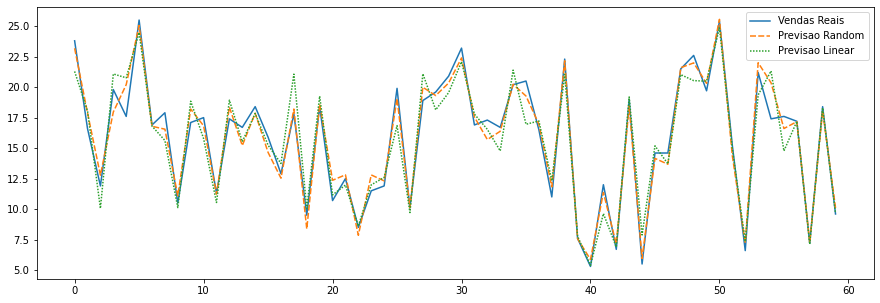

,Vendas Reais,Previsao Random,Previsao Linear
0,23.8,23.188,21.288161
1,16.6,17.893,18.042132
2,11.9,12.781,10.059590
3,19.8,17.958,21.082241
4,17.6,20.206,20.764760
5,25.5,25.057,24.471874
6,16.9,16.792,16.806436
7,17.9,16.553,15.628857
8,10.5,11.084,10.124799
9,17.1,18.204,18.846019


In [21]:
tabela_resultado = pd.DataFrame()

# tabela_resultado.index = x_test

tabela_resultado['Vendas Reais'] = y_test
tabela_resultado['Previsao Random'] = test_random
tabela_resultado['Previsao Linear'] = test_linear

# display(tabela_resultado)

tabela_resultado = tabela_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_resultado)
plt.show()
display(tabela_resultado)

#### Pelo fato do modelo Random Forest ter mostrado os melhores resultados, veja abaixo a importancia de cada variavel para a venda.

In [23]:
print(randomforest.feature_importances_)
print("TV", "Radio", "Jornal" )

[0.85067815 0.12978656 0.01953529]
TV Radio Jornal


#### Veja abaixo o somatorio gasto de cada variavel

In [24]:
print(tabela[["TV","Radio","Jornal"]].sum())

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


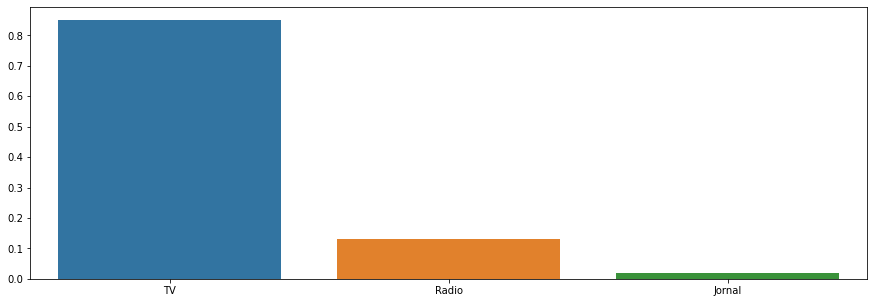

In [30]:
# importancia_features = pd.DataFrame(randomforest.feature_importances_, x_train.columns)

plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=randomforest.feature_importances_)
plt.show()

#### Conclusão:
- Ficou nítido que investir em TV, é a melhor opção para aumentar as vendas.
- A empresa está investindo mais em Jornal do que em Rádio. E, vimos que Jornal não impacta tanto nas vendas, portanto poderíamos investir mais em Rádio do que em Jornal.


#### Fazendo uma nova previsao de venda com novos valores de investimento em TV, Radio e Jornal.

In [44]:
# Como fazer uma nova previsao?
# importe a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)

nova_tabela = pd.read_csv("new advertising.csv")
display(nova_tabela)
nova_previsao = randomforest.predict(nova_tabela)
print(nova_previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.576  8.595 20.1  ]


#### Portanto:
- Se a Empresa investir 23.1 "mil" de publicidade em TV, 3.8 "mil" de publicidade em Radio e 69.2 "mil" de publicidade em Jornal, a previsão de vendas será de 7.576 "milhões".
- Se a Empresa investir 44.5 "mil" de publicidade em TV, 0.0 "mil" de publicidade em Radio e 5.1 "mil" de publicidade em Jornal, a previsão de vendas será de 8.595 "milhões".
- Se a Empresa investir 170.2 "mil" de publicidade em TV, 45.9 "mil" de publicidade em Radio e 0.0 "mil" de publicidade em Jornal, a previsào de vendas será de 20.1 "milhões".